## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
# import pandas for reading/importing csv data as dataframe
import pandas as pd
# import pathlib for managing the csv file's path
from pathlib import Path
# set matplotlib as inline for displaying charts
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
bitstamp_csv_path = Path("./Resources/bitstamp.csv")
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(bitstamp_csv_path,
                      index_col = 'Timestamp',
                      parse_dates = True,
                      infer_datetime_format = True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head and tail functions to confirm that the data was imported properly.
display(bitstamp.head())
display(bitstamp.tail())

# NOTE: We observe that the Close has prices in $s. We will have to remove the $ symbol
# inorder to use the price in calculations after converting the Close to a float (it is treated as an object by default)

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
coinbase_csv_path = Path("./Resources/coinbase.csv")
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(coinbase_csv_path,
                      index_col = 'Timestamp',
                      parse_dates = True,
                      infer_datetime_format = True)

In [5]:
# Use the head and tail functions to confirm that the data was imported properly.
display(coinbase.head())
display(coinbase.tail())

# NOTE: We observe that the Close has prices in $s. We will have to remove the $ symbol
# inorder to use the price in calculations after converting the Close to a float (it is treated as an object by default)

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean the data for analysis, we complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp['Close'] = bitstamp['Close'].str.replace("$","",regex=False)

### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp['Close'] = bitstamp['Close'].astype('float')

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()
# there are no duplicates to be dropped

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# For the coinbase DataFrame, drop all NaNs or missing values in the DataFrame
coinbase = coinbase.dropna()
# Use the str.replace function to remove the dollar sign, $
coinbase['Close'] = coinbase['Close'].str.replace("$", "", regex=False)
# Convert the Close data type to a float
coinbase['Close'] = coinbase['Close'].astype('float')
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum()
# there are no duplicates to be dropped

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [11]:
# Use loc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,["Close"]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [12]:
# Use loc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,["Close"]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [13]:
# Generate the summary statistics for the sliced bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [14]:
# Generate the summary statistics for the sliced coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Coinbase prices'}, xlabel='Timestamp'>

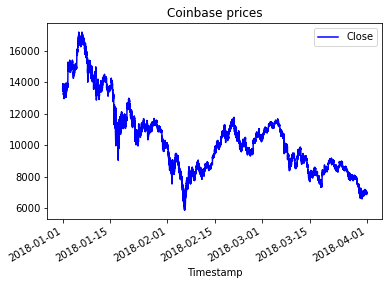

In [15]:
# Create a line plot for the coinbase's close prices related DataFrame for the full length of time in the dataset
coinbase_sliced.plot(figsize=(6,4), title="Coinbase prices", color="blue")

<AxesSubplot:title={'center':'Bitstamp prices'}, xlabel='Timestamp'>

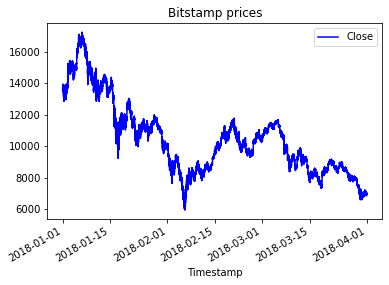

In [16]:
# Create a line plot for the bitstamp's close prices related DataFrame for the full length of time in the dataset
bitstamp_sliced.plot(figsize=(6,4), title="Bitstamp prices", color="blue")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

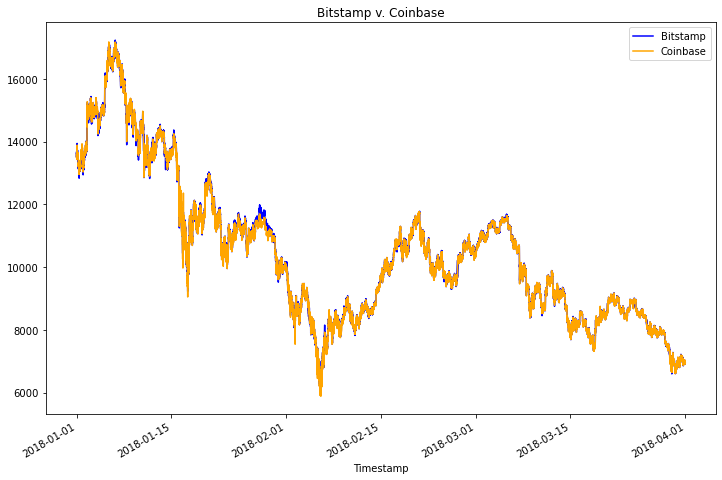

In [17]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot visualizes the prices over the full lenth of the dataset
ax=bitstamp_sliced['Close'].plot(figsize=(12,8), legend=True, title="Bitstamp v. Coinbase", color="blue", label='Bitstamp')
coinbase_sliced['Close'].plot(figsize=(12,8), legend=True, color="orange", label='Coinbase',ax=ax)

<AxesSubplot:title={'center':'Exchange Comparison (Earlier Time Period)'}, xlabel='Timestamp'>

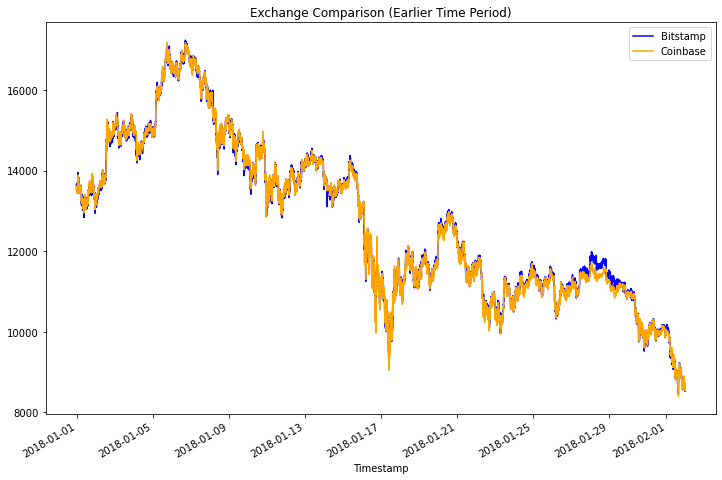

In [18]:
# Using the loc and plot functions, we create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
ax=bitstamp_sliced['Close'].loc['2018-01-01':'2018-02-01'].plot(figsize=(12,8), legend=True, title="Exchange Comparison (Earlier Time Period)", color="blue", label='Bitstamp')
coinbase_sliced['Close'].loc['2018-01-01':'2018-02-01'].plot(figsize=(12,8), legend=True, color="orange", label='Coinbase',ax=ax)

<AxesSubplot:title={'center':'Exchange Comparison (Later Time Period)'}, xlabel='Timestamp'>

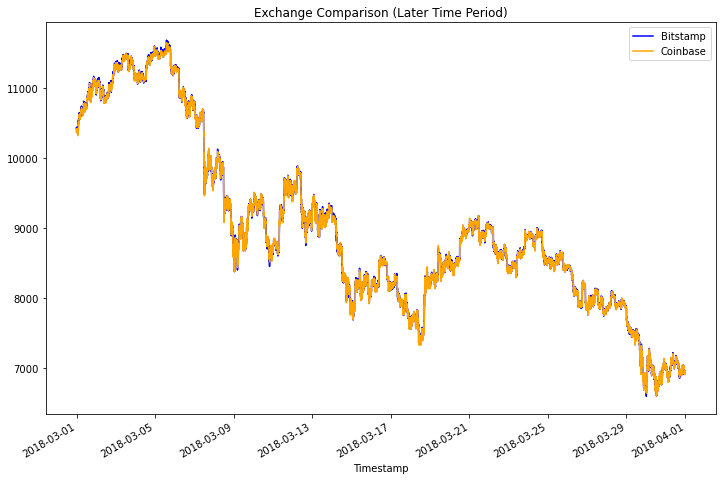

In [19]:
# Using the loc and plot functions, we create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
ax=bitstamp_sliced['Close'].loc['2018-03-01':'2018-04-01'].plot(figsize=(12,8), legend=True, title="Exchange Comparison (Later Time Period)", color="blue", label='Bitstamp')
coinbase_sliced['Close'].loc['2018-03-01':'2018-04-01'].plot(figsize=(12,8), legend=True, color="orange", label='Coinbase',ax=ax)

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Based on the visualizations, the spread was more in the earlier perion and it seems to have reduced in the later period and especially as the time progressed

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Jan 16, 2018'}, xlabel='Timestamp'>

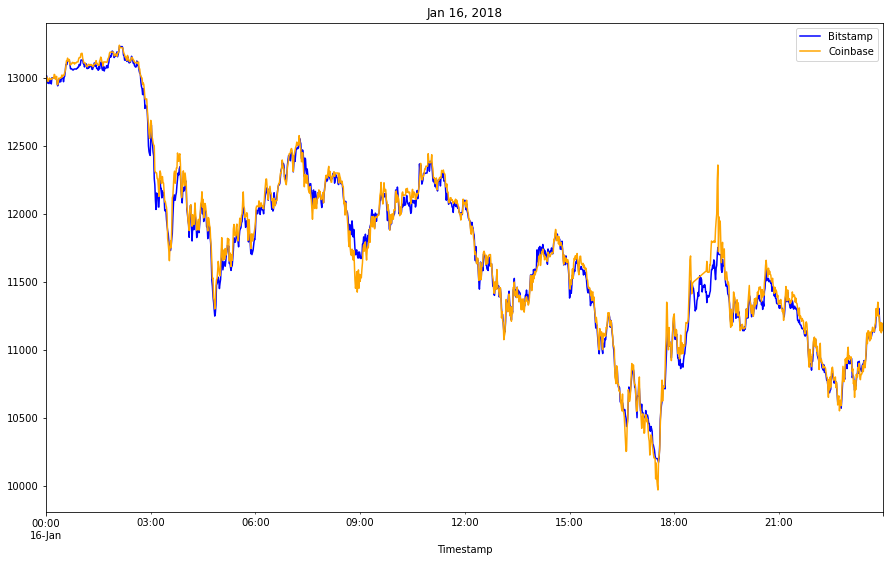

In [20]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# It shows that there are a lot of arbitrage options - we see a lot of deviation of blue from orange.
ax=bitstamp_sliced['Close'].loc['2018-01-16'].plot(figsize=(15,9), legend=True, title="Jan 16, 2018", color="blue", label='Bitstamp')
coinbase_sliced['Close'].loc['2018-01-16'].plot(figsize=(15,9), legend=True, color="orange", label='Coinbase',ax=ax)

In [21]:
# Using an early date, we calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# These are the opportunties in which we can buy at bitstamp and sell at coinbase
arbitrage_spread_early_bitstamp_to_coinbase = coinbase_sliced['Close'].loc['2018-01-16'] - bitstamp_sliced['Close'].loc['2018-01-16']

# Generate summary statistics for the early date bitstamp to coinbase DataFrame
arbitrage_spread_early_bitstamp_to_coinbase.describe()

# it looks like we can make money by buying at bitstamp and selling at coinbase because the mean of the difference is positive.
# There can be some negative trades also which we will have to avoid executing.

count    1419.000000
mean       23.212135
std        67.789186
min      -275.920000
25%        -8.330000
50%        22.280000
75%        52.355000
max       606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Early Date - buy at bitstamp and sell at coinbase'}>

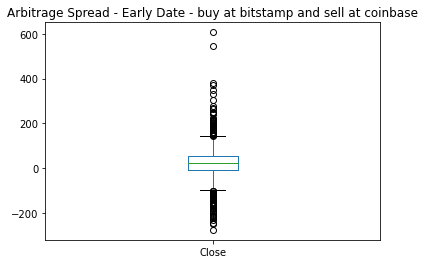

In [22]:
# Visualize the arbitrage spread when we can buy from bitstamp and sell at the coinbase from the early date in the dataset in a box plot
# It shows that we can make some money if we do so carefully
arbitrage_spread_early_bitstamp_to_coinbase.plot(kind="box", title="Arbitrage Spread - Early Date - buy at bitstamp and sell at coinbase")

In [23]:
# Using the early date, we calculate the arbitrage spread 
# by subtracting the coinbase lower closing prices from the bitstamp higher closing prices
# These are the opportunties in which we can buy at coinbase and sell at bitstamp

# NOTE: We analyze both possibilities - bitstamp to coinbase and coinbase to bitstamp because during the day
# both possibilities can exist. Bitcoin can be trading lower at Coinbase at certain times and trading lower at Bitstamp at other times. 
arbitrage_spread_early_coinbase_to_bitstamp = bitstamp_sliced['Close'].loc['2018-01-16'] - coinbase_sliced['Close'].loc['2018-01-16']

# Generate summary statistics for the early date coinbase to bitstamp DataFrame
arbitrage_spread_early_coinbase_to_bitstamp.describe()

# it looks like we can make money by buying at coinbase and selling at bitstamp because the maximum and 75th percentile of the difference is positive.
# There are a lot of negative trades also which we will have to avoid executing.

count    1419.000000
mean      -23.212135
std        67.789186
min      -606.800000
25%       -52.355000
50%       -22.280000
75%         8.330000
max       275.920000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Early Date - buy at coinbase and sell at bitstamp'}>

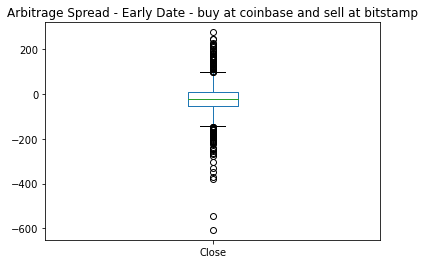

In [24]:
# Visualize the arbitrage spread when we can buy from coinbase and sell at the bitstamp from the early date in the dataset in a box plot
# It shows that we can make some money if we do so carefully
arbitrage_spread_early_coinbase_to_bitstamp.plot(kind="box", title="Arbitrage Spread - Early Date - buy at coinbase and sell at bitstamp")

<AxesSubplot:title={'center':'Februrary 24th, 2018'}, xlabel='Timestamp'>

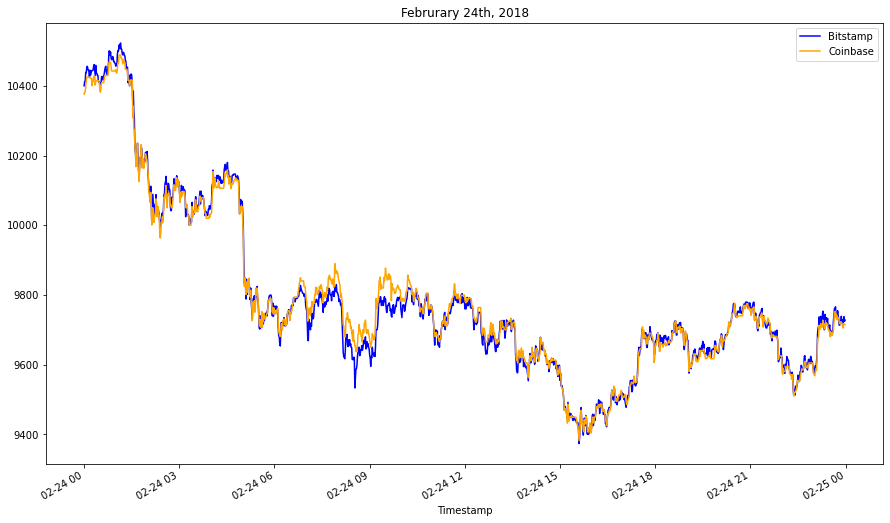

In [25]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# It shows that there are a lot of arbitrage options - we see a lot of deviation of blue from orange.
ax=bitstamp_sliced['Close'].loc['2018-02-24'].plot(figsize=(15,9), legend=True, title="Februrary 24th, 2018", color="blue", label='Bitstamp')
coinbase_sliced['Close'].loc['2018-02-24'].plot(figsize=(15,9), legend=True, color="orange", label='Coinbase', ax=ax)

In [26]:
# Using the date in the middle, let us calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# These are the opportunties in which we can buy at bitstamp and sell at coinbase
arbitrage_spread_middle_bitstamp_to_coinbase = coinbase_sliced['Close'].loc['2018-02-24'] - bitstamp_sliced['Close'].loc['2018-02-24']

# Generate summary statistics for the middle date bitstampe to coinbase data frame
arbitrage_spread_middle_bitstamp_to_coinbase.describe()

# it looks like we can make money by buying at bitstamp and selling at coinbase because the 
# mean and maximum of the difference is positive.
# There are a lot of negative trades also which we will have to avoid executing.

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Middle Date - buy at bitstamp and sell at coinbase'}>

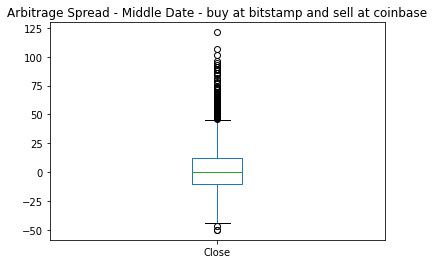

In [27]:
# Visualize the arbitrage spread when we can buy from coinbase and sell at the bitstamp from the middle of the dataset in a box plot
arbitrage_spread_middle_bitstamp_to_coinbase.plot(kind="box", title="Arbitrage Spread - Middle Date - buy at bitstamp and sell at coinbase")
# It shows that we can make some money if we do so carefully

In [28]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the coinbase lower closing prices from the bitstamp higher closing prices
# These are the opportunties in which we can buy at coinbase and sell at bitstamp
arbitrage_spread_middle_coinbase_to_bitstamp = bitstamp_sliced['Close'].loc['2018-02-24'] - coinbase_sliced['Close'].loc['2018-02-24']

# Generate summary statistics for middle date when we buy at coinbase and sell at bitstamp
arbitrage_spread_middle_coinbase_to_bitstamp.describe()
# it looks like we can make money by buying at coinbase and selling at bitstamp because the maximum and 75th percentile of the difference is positive.
# There are a lot of negative trades also which we will have to avoid executing.

count    1437.000000
mean       -3.396131
std        22.969472
min      -121.320000
25%       -12.120000
50%         0.010000
75%        10.590000
max        50.180000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Middle Date - buy at coinbase and sell at bitstamp'}>

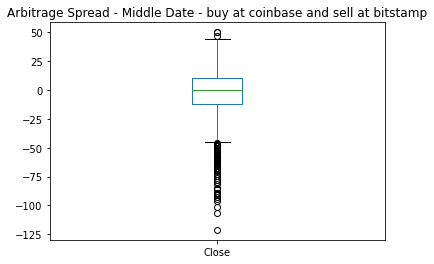

In [29]:
# Visualize the arbitrage spread when we can buy from coinbase and sell at the bitstamp from the middle of the dataset in a box plot
arbitrage_spread_middle_coinbase_to_bitstamp.plot(kind="box", title="Arbitrage Spread - Middle Date - buy at coinbase and sell at bitstamp")
# It shows that we can make some money if we do so carefully

<AxesSubplot:title={'center':'March 26th, 2018'}, xlabel='Timestamp'>

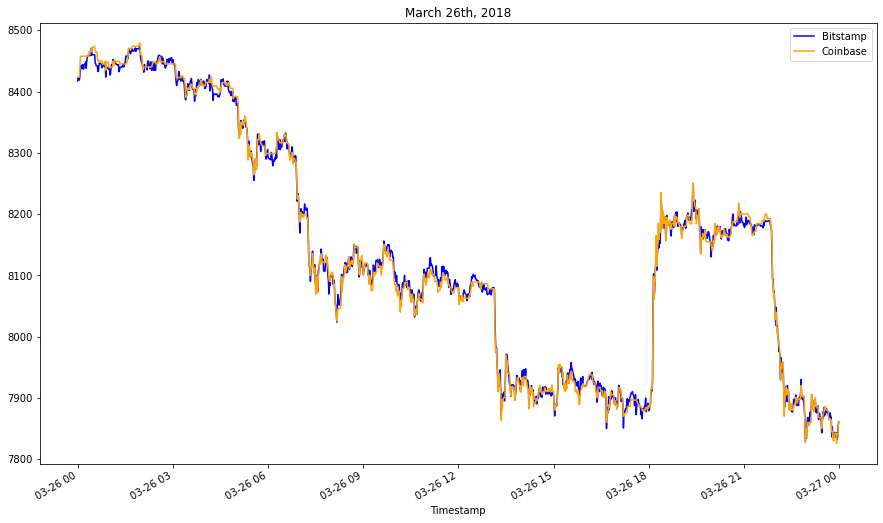

In [30]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# It shows that there are some arbitrage options - we see a lot of deviation of blue from orange.
ax=bitstamp_sliced['Close'].loc['2018-03-26'].plot(figsize=(15,9), legend=True, title="March 26th, 2018", color="blue", label='Bitstamp')
coinbase_sliced['Close'].loc['2018-03-26'].plot(figsize=(15,9), legend=True, color="orange", label='Coinbase',ax=ax)

In [31]:
# Using the date from the late, we calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# These are the opportunities in which we can buy at bitstamp and sell at coinbase 
arbitrage_spread_late_bitstamp_to_coinbase = coinbase_sliced['Close'].loc['2018-03-26'] - bitstamp_sliced['Close'].loc['2018-03-26']
    
# Generate summary statistics for the late date bitstampe to coinbase DataFrame
display(arbitrage_spread_late_bitstamp_to_coinbase.describe())

# it looks like we can make money by buying at bitstamp and selling at coinbase
# because the maximum and 75th percentile of the difference is positive.

count    1432.000000
mean       -0.722193
std         8.523060
min       -32.040000
25%        -6.812500
50%        -0.730000
75%         4.965000
max        35.070000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Late Date - buy from bitstamp and sell at coinbase'}>

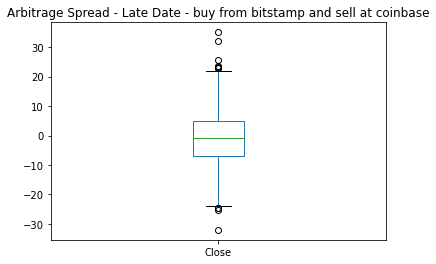

In [32]:
# Visualize the arbitrage spread when we can buy from bitstamp and sell at the coinbase from late in the dataset in a box plot
arbitrage_spread_late_bitstamp_to_coinbase.plot(kind="box", title="Arbitrage Spread - Late Date - buy from bitstamp and sell at coinbase")
# It shows that we can make some money if we do so carefully

In [33]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the coinbase lower closing prices from the bitstamp higher closing prices
arbitrage_spread_late_coinbase_to_bitstamp = bitstamp_sliced['Close'].loc['2018-03-26'] - coinbase_sliced['Close'].loc['2018-03-26']
    
# Generate summary statistics for the late date coinbase to bitstamp DataFrame
display(arbitrage_spread_late_coinbase_to_bitstamp.describe())

# it looks like we can make money by buying at coinbase and selling at bitstamp
# because the mean, maximum and 75th percentile of the difference is positive.

count    1432.000000
mean        0.722193
std         8.523060
min       -35.070000
25%        -4.965000
50%         0.730000
75%         6.812500
max        32.040000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Late Date - buy from coinbase and sell at bitstamp'}>

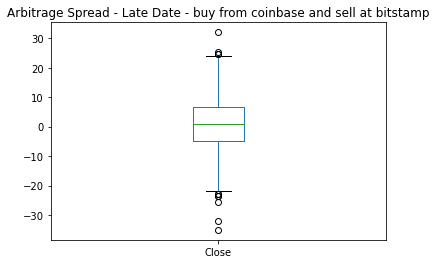

In [34]:
# Visualize the arbitrage spread when we can buy from coinbase and sell at the bitstamp from late in the dataset in a box plot
arbitrage_spread_late_coinbase_to_bitstamp.plot(kind="box", title="Arbitrage Spread - Late Date - buy from coinbase and sell at bitstamp")
# It shows that we can make some money if we do so carefully

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [35]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced bittamp exchange from the higher-priced coinbase one
arbitrage_spread_early_bitstamp_to_coinbase = coinbase_sliced['Close'].loc['2018-01-16'] - bitstamp_sliced['Close'].loc['2018-01-16']

# Use a conditional statement to generate the summary statistics for early date bitstamp to coinbase arbitrage_spread DataFrame
display(arbitrage_spread_early_bitstamp_to_coinbase[arbitrage_spread_early_bitstamp_to_coinbase > 0].describe())
# It shows that there are many opportunities on the early date when you buy at bitstamp and sell at coinbase in which the spread is positive

count    960.000000
mean      53.405344
std       53.910409
min        0.010000
25%       21.602500
50%       39.885000
75%       68.547500
max      606.800000
Name: Close, dtype: float64

In [36]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced coinbase exchange from the higher-priced bitstamp one
arbitrage_spread_early_coinbase_to_bitstamp = bitstamp_sliced['Close'].loc['2018-01-16'] - coinbase_sliced['Close'].loc['2018-01-16']

# Use a conditional statement to generate the summary statistics for early date coinbase to bitstamp arbitrage_spread DataFrame
display(arbitrage_spread_early_coinbase_to_bitstamp[arbitrage_spread_early_coinbase_to_bitstamp > 0].describe())
# It shows that there are many opportunities when you buy at coinbase and sell at bitstamp when the spread is positive

count    451.000000
mean      40.645477
std       47.387457
min        0.010000
25%       10.010000
50%       26.830000
75%       49.330000
max      275.920000
Name: Close, dtype: float64

In [37]:
# For the date in the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced bitstamp exchange from the higher-priced coinbase one
arbitrage_spread_middle_bitstamp_to_coinbase = coinbase_sliced['Close'].loc['2018-02-24'] - bitstamp_sliced['Close'].loc['2018-02-24']

# Use a conditional statement to generate the summary statistics for middle date bitstamp to coinbase arbitrage_spread DataFrame
display(arbitrage_spread_middle_bitstamp_to_coinbase[arbitrage_spread_middle_bitstamp_to_coinbase > 0].describe())

# it shows that there are many opportunities when you buy at bitstamp and sell at coinbase in which the spread is positive.

count    713.000000
mean      19.880351
std       20.699851
min        0.010000
25%        5.040000
50%       12.330000
75%       27.250000
max      121.320000
Name: Close, dtype: float64

In [38]:
# For the date in the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced coinbase exchange from the higher-priced bitstamp one
arbitrage_spread_middle_coinbase_to_bitstamp = bitstamp_sliced['Close'].loc['2018-02-24'] - coinbase_sliced['Close'].loc['2018-02-24']

# Use a conditional statement to generate the summary statistics for middle date coinbase to bitstamp arbitrage_spread DataFrame
display(arbitrage_spread_middle_coinbase_to_bitstamp[arbitrage_spread_middle_coinbase_to_bitstamp > 0].describe())

# it shows that there are many opportunities when you buy at coinbase and sell at bitstamp in which the spread is positive.

count    719.000000
mean      12.926912
std        9.672629
min        0.010000
25%        5.335000
50%       10.590000
75%       18.245000
max       50.180000
Name: Close, dtype: float64

In [39]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced bitstamp exchange from the higher-priced coinbase one
arbitrage_spread_late_bitstamp_to_coinbase = coinbase_sliced['Close'].loc['2018-03-26'] - bitstamp_sliced['Close'].loc['2018-03-26']

# Use a conditional statement to generate the summary statistics for late date bitstamp and coinbase arbitrage_spread DataFrame
display(arbitrage_spread_late_bitstamp_to_coinbase[arbitrage_spread_late_bitstamp_to_coinbase > 0].describe())

# it shows that there are many opportunities when you buy at bitstampe and sell at coinbase in which the spread is positive.

count    651.000000
mean       6.689247
std        5.240159
min        0.010000
25%        2.835000
50%        5.230000
75%        9.195000
max       35.070000
Name: Close, dtype: float64

In [40]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced coinbase exchange from the higher-priced bitstamp one
arbitrage_spread_late_coinbase_to_bitstamp = bitstamp_sliced['Close'].loc['2018-03-26'] - coinbase_sliced['Close'].loc['2018-03-26']

# Use a conditional statement to generate the summary statistics for late date coinbase to bitstamp arbitrage_spread DataFrame
display(arbitrage_spread_late_coinbase_to_bitstamp[arbitrage_spread_late_coinbase_to_bitstamp > 0].describe())

# it shows that there are many opportunities when you buy at coinbase and sell at bitstamp in which the spread is positive.

count    772.000000
mean       6.980415
std        5.106336
min        0.010000
25%        2.967500
50%        6.285000
75%        9.915000
max       32.040000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [41]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early_bitstamp_to_coinbase = arbitrage_spread_early_bitstamp_to_coinbase[arbitrage_spread_early_bitstamp_to_coinbase > 0] / bitstamp_sliced['Close'].loc['2018-01-16']

# Review the early spread return DataFrame
display(spread_return_early_bitstamp_to_coinbase.head())
display(spread_return_early_bitstamp_to_coinbase.tail())

# it shows that there are opportunties when you buy at bitstamp and sell at coinbase in which the spread return in positive

Timestamp
2018-01-16 00:00:00         NaN
2018-01-16 00:01:00         NaN
2018-01-16 00:02:00    0.000731
2018-01-16 00:03:00    0.001108
2018-01-16 00:04:00    0.000909
Name: Close, dtype: float64

Timestamp
2018-01-16 23:55:00    0.000546
2018-01-16 23:56:00         NaN
2018-01-16 23:57:00    0.002153
2018-01-16 23:58:00         NaN
2018-01-16 23:59:00         NaN
Name: Close, dtype: float64

In [42]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early_coinbase_to_bitstamp = arbitrage_spread_early_coinbase_to_bitstamp[arbitrage_spread_early_coinbase_to_bitstamp > 0] / coinbase_sliced['Close'].loc['2018-01-16']

# Review the early spread return DataFrame
display(spread_return_early_coinbase_to_bitstamp.head())
display(spread_return_early_coinbase_to_bitstamp.tail())

# it shows that there are opportunties when you buy at coinbase and sell at bitstamp in which the spread return in positive

Timestamp
2018-01-16 00:00:00    0.000694
2018-01-16 00:01:00    0.000640
2018-01-16 00:02:00         NaN
2018-01-16 00:03:00         NaN
2018-01-16 00:04:00         NaN
Name: Close, dtype: float64

Timestamp
2018-01-16 23:55:00         NaN
2018-01-16 23:56:00    0.004115
2018-01-16 23:57:00         NaN
2018-01-16 23:58:00    0.004049
2018-01-16 23:59:00    0.004565
Name: Close, dtype: float64

In [43]:
# For the date in the middle of the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle_bitstamp_to_coinbase = arbitrage_spread_middle_bitstamp_to_coinbase[arbitrage_spread_middle_bitstamp_to_coinbase > 0] / bitstamp_sliced['Close'].loc['2018-02-24']

# Review the middle spread return DataFrame
display(spread_return_middle_bitstamp_to_coinbase.head())
display(spread_return_middle_bitstamp_to_coinbase.tail())

# it shows that in the brief review there don't appear to be many opportunities when you buy at bitstamp and
# sell at coinbase in which the spread return is valid.

Timestamp
2018-02-24 00:00:00   NaN
2018-02-24 00:01:00   NaN
2018-02-24 00:02:00   NaN
2018-02-24 00:03:00   NaN
2018-02-24 00:04:00   NaN
Name: Close, dtype: float64

Timestamp
2018-02-24 23:55:00   NaN
2018-02-24 23:56:00   NaN
2018-02-24 23:57:00   NaN
2018-02-24 23:58:00   NaN
2018-02-24 23:59:00   NaN
Name: Close, dtype: float64

In [44]:
# For the date in the middle of the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle_coinbase_to_bitstamp = arbitrage_spread_middle_coinbase_to_bitstamp[arbitrage_spread_middle_coinbase_to_bitstamp > 0] / coinbase_sliced['Close'].loc['2018-02-24']

# Review the middle spread return DataFrame
display(spread_return_middle_coinbase_to_bitstamp.head())
display(spread_return_middle_coinbase_to_bitstamp.tail())

# it shows that there are opportunties when you buy at coinbase and sell at bitstamp in which the spread return in positive

Timestamp
2018-02-24 00:00:00    0.002313
2018-02-24 00:01:00    0.002897
2018-02-24 00:02:00    0.002851
2018-02-24 00:03:00    0.003819
2018-02-24 00:04:00    0.002383
Name: Close, dtype: float64

Timestamp
2018-02-24 23:55:00    0.001546
2018-02-24 23:56:00    0.000717
2018-02-24 23:57:00    0.002129
2018-02-24 23:58:00    0.000763
2018-02-24 23:59:00    0.001370
Name: Close, dtype: float64

In [45]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late_bitstamp_to_coinbase = arbitrage_spread_late_bitstamp_to_coinbase[arbitrage_spread_late_bitstamp_to_coinbase > 0] / bitstamp_sliced['Close'].loc['2018-03-26']

# Review the late spread return DataFrame
display(spread_return_late_bitstamp_to_coinbase.head())
display(spread_return_late_bitstamp_to_coinbase.tail())

# it shows that there are opportunties when you buy at bitstamp and sell at coinbase in which the spread return in positive

Timestamp
2018-03-26 00:00:00    0.000738
2018-03-26 00:01:00    0.000122
2018-03-26 00:02:00    0.000470
2018-03-26 00:03:00    0.000576
2018-03-26 00:04:00    0.001395
Name: Close, dtype: float64

Timestamp
2018-03-26 23:55:00         NaN
2018-03-26 23:56:00    0.001148
2018-03-26 23:57:00    0.000587
2018-03-26 23:58:00         NaN
2018-03-26 23:59:00         NaN
Name: Close, dtype: float64

In [46]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late_coinbase_to_bitstamp = arbitrage_spread_late_coinbase_to_bitstamp[arbitrage_spread_late_coinbase_to_bitstamp > 0] / coinbase_sliced['Close'].loc['2018-03-26']

# Review the late spread return DataFrame
display(spread_return_late_coinbase_to_bitstamp.head())
display(spread_return_late_coinbase_to_bitstamp.tail())

# it shows that there are some opportunties when you buy at coinbase and sell at bitstamp in which the spread return in positive

Timestamp
2018-03-26 00:00:00   NaN
2018-03-26 00:01:00   NaN
2018-03-26 00:02:00   NaN
2018-03-26 00:03:00   NaN
2018-03-26 00:04:00   NaN
Name: Close, dtype: float64

Timestamp
2018-03-26 23:55:00    0.002286
2018-03-26 23:56:00         NaN
2018-03-26 23:57:00         NaN
2018-03-26 23:58:00    0.001472
2018-03-26 23:59:00    0.000043
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [47]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early_bitstamp_to_coinbase = spread_return_early_bitstamp_to_coinbase[spread_return_early_bitstamp_to_coinbase > 0.01]

# Review the first five profitable trades
display(profitable_trades_early_bitstamp_to_coinbase.head())
display(profitable_trades_early_bitstamp_to_coinbase.tail())

# it shows that there are opportunities when you buy at bitstamp and sell at coinbase in which the costs can be recovered

Timestamp
2018-01-16 02:56:00    0.012962
2018-01-16 02:57:00    0.010838
2018-01-16 02:59:00    0.014171
2018-01-16 03:00:00    0.010675
2018-01-16 03:06:00    0.019704
Name: Close, dtype: float64

Timestamp
2018-01-16 19:23:00    0.010724
2018-01-16 19:26:00    0.011351
2018-01-16 19:38:00    0.011098
2018-01-16 19:48:00    0.010456
2018-01-16 20:07:00    0.010119
Name: Close, dtype: float64

In [48]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early_coinbase_to_bitstamp = spread_return_early_coinbase_to_bitstamp[spread_return_early_coinbase_to_bitstamp > 0.01]

# Review the first five profitable trades
display(profitable_trades_early_coinbase_to_bitstamp.head())
display(profitable_trades_early_coinbase_to_bitstamp.tail())

# it shows that there are opportunities when you buy at coinbase and sell at bitstamp in which the costs can be recovered

Timestamp
2018-01-16 07:39:00    0.010341
2018-01-16 08:43:00    0.013533
2018-01-16 08:44:00    0.013085
2018-01-16 08:45:00    0.013013
2018-01-16 08:46:00    0.017702
Name: Close, dtype: float64

Timestamp
2018-01-16 17:18:00    0.017938
2018-01-16 17:28:00    0.014924
2018-01-16 17:30:00    0.014925
2018-01-16 17:31:00    0.019999
2018-01-16 17:32:00    0.021667
Name: Close, dtype: float64

In [49]:
# For the date in the middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle_bitstamp_to_coinbase = spread_return_middle_bitstamp_to_coinbase[spread_return_middle_bitstamp_to_coinbase > 0.01]

# Review the first five profitable trades
display(profitable_trades_middle_bitstamp_to_coinbase.head())
display(profitable_trades_middle_bitstamp_to_coinbase.tail())

# it shows that there are 3 opportunities when you buy at bitstamp and sell at coinbase in which the costs can be recovered

Timestamp
2018-02-24 08:32:00    0.012726
2018-02-24 09:32:00    0.010974
2018-02-24 09:39:00    0.010431
Name: Close, dtype: float64

Timestamp
2018-02-24 08:32:00    0.012726
2018-02-24 09:32:00    0.010974
2018-02-24 09:39:00    0.010431
Name: Close, dtype: float64

In [50]:
# For the date in the middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle_coinbase_to_bitstamp = spread_return_middle_coinbase_to_bitstamp[spread_return_middle_coinbase_to_bitstamp > 0.01]

# Review the first five profitable trades
display(profitable_trades_middle_coinbase_to_bitstamp.head())
display(profitable_trades_middle_coinbase_to_bitstamp.tail())

# it shows that there are no opportunities when you buy at coinbase and sell at bitstamp in which the costs can be recovered

Series([], Name: Close, dtype: float64)

Series([], Name: Close, dtype: float64)

In [51]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late_bitstamp_to_coinbase = spread_return_late_bitstamp_to_coinbase[spread_return_late_bitstamp_to_coinbase > 0.01]

# Review the first five profitable trades
display(profitable_trades_late_bitstamp_to_coinbase.head())
display(profitable_trades_late_bitstamp_to_coinbase.tail())

# it shows that there are no opportunities when you buy at bitstamp and sell at coinbase in which the costs can be recovered

Series([], Name: Close, dtype: float64)

Series([], Name: Close, dtype: float64)

In [52]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late_coinbase_to_bitstamp = spread_return_late_coinbase_to_bitstamp[spread_return_late_coinbase_to_bitstamp > 0.01]

# Review the first five profitable trades
display(profitable_trades_late_coinbase_to_bitstamp.head())
display(profitable_trades_late_coinbase_to_bitstamp.tail())

# it shows that there are no opportunities when you buy at coinbase and sell at bitstamp in which the costs can be recovered

Series([], Name: Close, dtype: float64)

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [53]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early_bitstamp_to_coinbase.describe()

# it shows that there are 73 opportunities when you buy at bitstamp and sell at coinbase in which the costs can be recovered and are profitable

count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64

In [54]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early_coinbase_to_bitstamp.describe()
# it shows that there are 36 opportunities when you buy at coinbase and sell at bitstamp in which the costs can be recovered and are profitable

count    36.000000
mean      0.015715
std       0.003830
min       0.010341
25%       0.012960
50%       0.014925
75%       0.018038
max       0.024152
Name: Close, dtype: float64

In [55]:
# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle_bitstamp_to_coinbase.describe()
# it shows that there are 3 opportunities when you buy at bitstamp and sell at coinbase in which the costs can be recovered and are profitable

count    3.000000
mean     0.011377
std      0.001199
min      0.010431
25%      0.010703
50%      0.010974
75%      0.011850
max      0.012726
Name: Close, dtype: float64

In [56]:
# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle_coinbase_to_bitstamp.describe()
# it shows that there are no opportunities when you buy at coinbase and sell at bitstamp in which the costs can be recovered and are profitable

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [57]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late_bitstamp_to_coinbase.describe()
# it shows that there are no opportunities when you buy at bitstamp and sell at coinbase in which the costs can be recovered and are profitable

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [58]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late_coinbase_to_bitstamp.describe()
# it shows that there are no opportunities when you buy at coinbase and sell at bitstamp in which the costs can be recovered and are profitable

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [59]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early_bitstamp_to_coinbase = profitable_trades_early_bitstamp_to_coinbase * bitstamp_sliced['Close'].loc['2018-01-16']

# Drop any missing values from the profit DataFrame
profit_per_trade_early_bitstamp_to_coinbase = profit_early_bitstamp_to_coinbase.dropna()

# View the early profit DataFrame
profit_per_trade_early_bitstamp_to_coinbase
# it shows there are at a lot of profit generated if every profitable oppotunity to buy at bitstamp and sell at coinbase is used.

Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
                        ...  
2018-01-16 19:23:00    125.09
2018-01-16 19:26:00    131.78
2018-01-16 19:38:00    124.01
2018-01-16 19:48:00    117.63
2018-01-16 20:07:00    113.69
Name: Close, Length: 73, dtype: float64

In [60]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early_coinbase_to_bitstamp = profitable_trades_early_coinbase_to_bitstamp * coinbase_sliced['Close'].loc['2018-01-16']

# Drop any missing values from the profit DataFrame
profit_per_trade_early_coinbase_to_bitstamp = profit_early_coinbase_to_bitstamp.dropna()

# View the early profit DataFrame
profit_per_trade_early_coinbase_to_bitstamp
# it shows there are at a lot of profit generated if every profitable oppotunity to buy at coinbase and sell at bitstamp is used.

Timestamp
2018-01-16 07:39:00    124.56
2018-01-16 08:43:00    158.91
2018-01-16 08:44:00    153.10
2018-01-16 08:45:00    152.18
2018-01-16 08:46:00    207.82
2018-01-16 08:47:00    214.26
2018-01-16 08:48:00    170.03
2018-01-16 08:49:00    155.02
2018-01-16 08:50:00    190.45
2018-01-16 08:51:00    229.71
2018-01-16 08:52:00    247.04
2018-01-16 08:53:00    219.35
2018-01-16 08:54:00    160.96
2018-01-16 08:55:00    275.92
2018-01-16 08:56:00    192.98
2018-01-16 08:57:00    131.17
2018-01-16 08:58:00    222.15
2018-01-16 08:59:00    163.98
2018-01-16 09:00:00    192.00
2018-01-16 09:01:00    121.33
2018-01-16 09:02:00    142.52
2018-01-16 09:04:00    135.86
2018-01-16 14:04:00    134.66
2018-01-16 16:35:00    138.26
2018-01-16 16:36:00    170.86
2018-01-16 16:37:00    247.61
2018-01-16 16:38:00    179.66
2018-01-16 17:04:00    177.97
2018-01-16 17:08:00    114.32
2018-01-16 17:09:00    110.00
2018-01-16 17:17:00    132.19
2018-01-16 17:18:00    183.43
2018-01-16 17:28:00    149.99


In [61]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = pd.concat([profit_per_trade_early_bitstamp_to_coinbase, profit_per_trade_early_coinbase_to_bitstamp], axis='rows', join='inner')

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

profit_per_trade_early.sort_index(inplace=True)

# View the early profit DataFrame
profit_per_trade_early
# it shows there are at a lot of profit generated if every profitable oppotunity to buy at lower price exchange
# and sell at higher price exchange is used.

Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
                        ...  
2018-01-16 19:23:00    125.09
2018-01-16 19:26:00    131.78
2018-01-16 19:38:00    124.01
2018-01-16 19:48:00    117.63
2018-01-16 20:07:00    113.69
Name: Close, Length: 109, dtype: float64

In [62]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
# NOTE: We only worry about buying at bitsamp and selling at coinbase because there are no valid opportunities
# to generate profit when we buy at coinbase and sell at bitstamp
profit_middle = profitable_trades_middle_bitstamp_to_coinbase * bitstamp_sliced['Close'].loc['2018-02-24']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle
# it shows there are 3 profitable oppotunity to buy at bitstamp and sell at coinbase.

Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    107.00
2018-02-24 09:39:00    101.75
Name: Close, dtype: float64

In [63]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
# NOTE: there are no profitable opportunities when we buy at bitstamp and sell at coinbase or vice versa
profit_late = profitable_trades_late_bitstamp_to_coinbase * bitstamp_sliced['Close'].loc['2018-03-26']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late
# it shows there are no profitable oppotunity to buy at bitstamp and sell at coinbase or vice versa

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [64]:
# Generate the summary statistics for the early date profit per trade DataFrame
profit_per_trade_early_bitstamp_to_coinbase.describe()
# it shows that a mean profit of 193 can be generated from 73 oppotunities when buying at bitstamp and selling at coinbase

count     73.000000
mean     193.796849
std       88.701429
min      112.520000
25%      139.420000
50%      171.310000
75%      210.060000
max      606.800000
Name: Close, dtype: float64

In [65]:
# Generate the summary statistics for the early date profit per trade DataFrame
profit_per_trade_early_coinbase_to_bitstamp.describe()
# it shows that a mean profit of 174 can be generated from 36 oppotunities when buying at coinbase and selling at bitstamp

count     36.000000
mean     174.062222
std       41.263561
min      110.000000
25%      141.455000
50%      167.005000
75%      201.947500
max      275.920000
Name: Close, dtype: float64

In [66]:
# Generate the summary statistics for the early date profit per trade DataFrame
profit_per_trade_early.describe()
# it shows that a mean profit of 187 can be generated from 109 oppotunities when buying at a lower priced exchange
# and selling at higher priced exchange

count    109.000000
mean     187.278991
std       76.707452
min      110.000000
25%      139.420000
50%      170.030000
75%      210.050000
max      606.800000
Name: Close, dtype: float64

In [67]:
# Generate the summary statistics for the middle date profit per trade DataFrame
profit_per_trade_middle.describe()
# it shows that a mean profit of 110 can be generated from 3 oppotunities when buying at bitstamp and selling at coinbase

count      3.000000
mean     110.023333
std       10.129246
min      101.750000
25%      104.375000
50%      107.000000
75%      114.160000
max      121.320000
Name: Close, dtype: float64

In [68]:
# Generate the summary statistics for the late date profit per trade DataFrame
profit_per_trade_late.describe()
# It shows that no profit can be generated by buying at any lower priced exchange and selling at a higher priced exchange

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Early Date - buy from bitstamp and sell at coinbase'}, xlabel='Timestamp'>

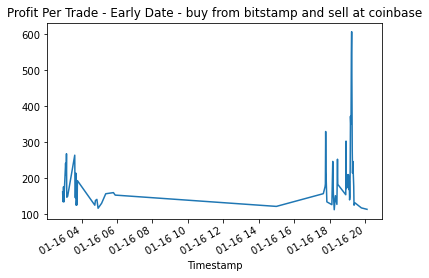

In [69]:
# Plot the results for the early date profit per trade DataFrame
profit_per_trade_early_bitstamp_to_coinbase.plot(title="Profit Per Trade - Early Date - buy from bitstamp and sell at coinbase")
# It shows how the profit opportunities are spread out. There are some activity early in the day and some very good oppotunities 
# towards the end of the day. 

<AxesSubplot:title={'center':'Profit Per Trade - Early Date - buy from coinbase and sell at bitstamp'}, xlabel='Timestamp'>

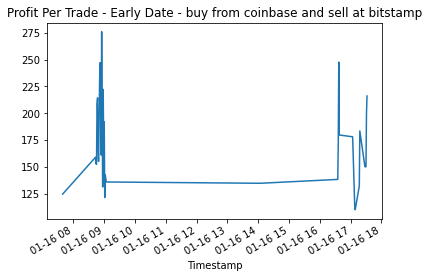

In [70]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early_coinbase_to_bitstamp.plot(title="Profit Per Trade - Early Date - buy from coinbase and sell at bitstamp")
# It shows how the profit opportunities are spread out. There are some activity early in the day and some very good oppotunities 
# towards the end of the day. 

<AxesSubplot:title={'center':'Profit Per Trade - Early Date'}, xlabel='Timestamp'>

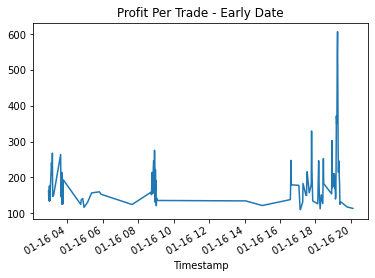

In [71]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(title="Profit Per Trade - Early Date")
# It shows how the profit opportunities are spread out. There are some activity early in the day and some very good oppotunities 
# towards the end of the day. 

<AxesSubplot:title={'center':'Profit Per Trade - Middle Date'}, xlabel='Timestamp'>

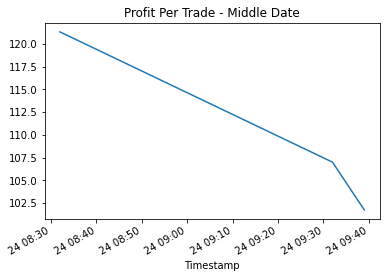

In [72]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(title="Profit Per Trade - Middle Date")
# It shows how the profit opportunities are spread out. There are 3 opporunities. all the opportunities are early in the day.

<AxesSubplot:title={'center':'Profit Per Trade - Late Date'}, xlabel='Timestamp'>

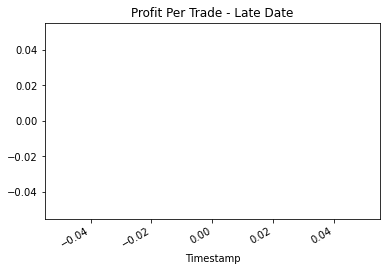

In [73]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot(title="Profit Per Trade - Late Date")
# there are no profit taking opportunities on this day.

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [74]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early_bitstamp_to_coinbase.sum()
# it shows a profit of ~ $14147 can be generated when buying at bitstamp and selling at coinbase for the early date

14147.169999999998

In [75]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early_coinbase_to_bitstamp.sum()
# it shows a profit of ~ $6266 can be generated when buying at bitstamp and selling at coinbase for the early date

6266.24

In [76]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early_bitstamp_to_coinbase.sum() + profit_per_trade_early_coinbase_to_bitstamp.sum()
# it shows a total profit of ~ $20413 can be generated when buying at bitstamp and selling at coinbase and vice versa for the early date

20413.409999999996

In [77]:
profit_per_trade_early.sum()
# calculate in a different way, the total profit of arbitrage for the early date is ~ $20413 confirming the previous calculation

20413.410000000003

In [78]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_per_trade_middle.sum()
# it shows that a total profit of arbitrage is ~ $330 for middle date

330.0699999999997

In [79]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_per_trade_late.sum()
# it shows that there in no profit of arbitrage for the late date.

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [80]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early_bitstamp_to_coinbase = profit_per_trade_early_bitstamp_to_coinbase.cumsum()
# calculate the cumulative profit when buying at bitstamp and selling at coinbase on the early date

<AxesSubplot:title={'center':'Cumulative Profit Sum - Early Date - 1/16/2018 - buy from bitstamp and sell at coinbase'}, xlabel='Timestamp'>

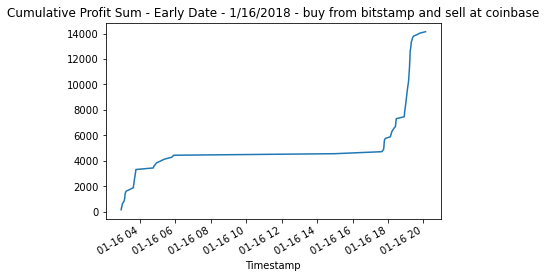

In [81]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early_bitstamp_to_coinbase.plot(title="Cumulative Profit Sum - Early Date - 1/16/2018 - buy from bitstamp and sell at coinbase")

# The plot of the cumulative profit when buying at bitstamp and selling at coinbase on the early date shows that profit is 
# made early in the day and later in the day (When Asia opens up).
# There appears to be not much profitable aribtrage oppotunities during the working hours in the US.

In [82]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early_coinbase_to_bitstamp = profit_per_trade_early_coinbase_to_bitstamp.cumsum()
# calculate the cumulative profit when buying at coinbase and selling at bitstamp on the early date

<AxesSubplot:title={'center':'Cumulative Profit Sum - Early Date -1/16/2018 - buy from coinbase and see at bitstamp'}, xlabel='Timestamp'>

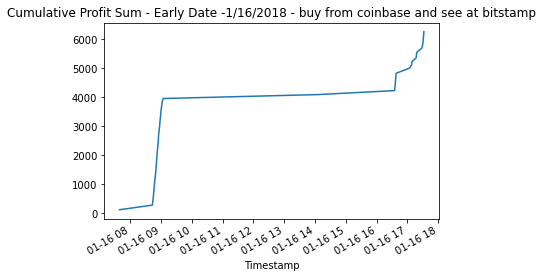

In [83]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early_coinbase_to_bitstamp.plot(title="Cumulative Profit Sum - Early Date -1/16/2018 - buy from coinbase and see at bitstamp")

# The plot of the cumulative profit when buying at coinbase and selling at bitstamp on the early date shows that profit is 
# made early in the day and later in the day (When Asia opens up or gets active).
# There appears to be not much profitable aribtrage oppotunities during the working hours in the US.

In [84]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
# calculate the total cumulative profit for arbitrage on the early date

<AxesSubplot:title={'center':'Cumulative Profit Sum - Early Date - 01/16/2018'}, xlabel='Timestamp'>

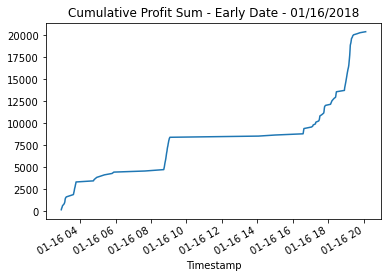

In [85]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(title="Cumulative Profit Sum - Early Date - 01/16/2018")

# The plot of the total cumulative profit of arbitrage on the early date shows that profit is 
# made early in the day and later in the day (When Asia opens up).
# There appears to be not much profitable aribtrage oppotunities during the working hours in the US.

In [86]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()
# calculate the total cumulative profit for arbitrage on the middle date

<AxesSubplot:title={'center':'Cumulative Profit Sum - Middle Date - 02/24/2018'}, xlabel='Timestamp'>

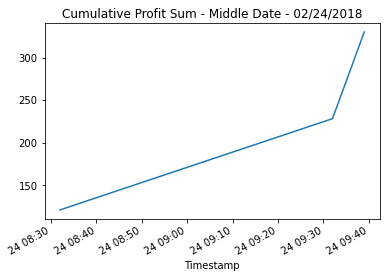

In [87]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot(title="Cumulative Profit Sum - Middle Date - 02/24/2018")
# The plot of the total cumulative profit on the middle date shows that profit is 
# made early in the day. There appears to be not much profitable aribtrage oppotunities during the working hours in the US.

In [88]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()
# calculate the total cumulative profit for arbitrage on the late date

<AxesSubplot:title={'center':'Cumulative Profit Sum - Late Date - 03/26/2018'}, xlabel='Timestamp'>

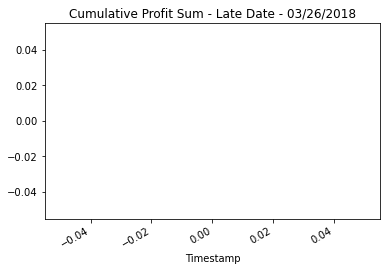

In [89]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot(title="Cumulative Profit Sum - Late Date - 03/26/2018")
# The plot of the total cumulative profit on the late date shows that no profit is made

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** The review of the profit information shows that in general profit is made early in the day. The middle of the day (working hours in the US) present no profitable opportunities. For the earlier date, it shows that profit can also be made later in the day when Asia opens up or gets active. For the later dates, we don't any profitable oppotunities. So, in general, the trend is that profit can be made in the earlier period vs later period and earlier in the day vs the working hours in the US. In the earlier period, profit can also be made later in the day (when Asia gets active)